In [ ]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
! pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.8 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32194 sha256=2b7ab9b1bcfc18c7505a40de89fd755f8f7e21c99551406064387e0de4c5b543
  Stored in directory: /root/.cache/pip/wheels/a6/1c/91/32f7a6b0a9d6bbcef17a7fc0d065f9a9b8d9904551b377b64d
Successfully built jcopml


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words("indonesian") + list(punctuation)

### Import Data

In [ ]:
df = pd.read_excel("Stemming.xlsx")
df

,Stemming,LABEL
0,seokjin ya pas kenal bangtan lihat seokjin pes...,terkejut
1,wkwk iri dengki deh,jijik
2,gue jalan aga rame orang jual gua lihat dagang...,sedih
3,lwbsksn ya igual muak,jijik
4,anjrit gua kaget gws banget naduffuff,terkejut
...,...,...
2441,sampah tengok letak skillset msoffice ret nak ...,jijik
2442,main kampung seberang ya allah takjub devinisi...,terkejut
2443,kadang takle focus tengok cerita ha rams visua...,terkejut
2444,nangroe aceh darussalam istimewa al fatihah te...,marah


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['label_cat']= label_encoder.fit_transform(df['LABEL'])

df['label_cat'].unique()

array([5, 0, 2, 3, 1, 4])

In [ ]:
df.LABEL.value_counts(normalize=True)

terkejut    0.292723
jijik       0.282502
senang      0.130417
marah       0.124693
sedih       0.114064
takut       0.055601
Name: LABEL, dtype: float64

In [ ]:
df.label_cat.value_counts(normalize=True)

5    0.292723
0    0.282502
3    0.130417
1    0.124693
2    0.114064
4    0.055601
Name: label_cat, dtype: float64

### Dataset Spliting

In [ ]:
X = df.Stemming
y = df.label_cat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1956,), (490,), (1956,), (490,))

### Training Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.5, 0.7, 0.9],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
rsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

In [ ]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


ValueError: ignored

In [ ]:
from jcopml.plot import plot_confusion_matrix,plot_roc_curve,plot_classification_report

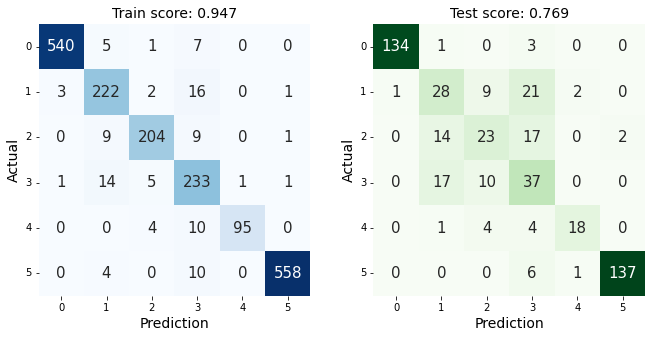

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

ValueError: ignored

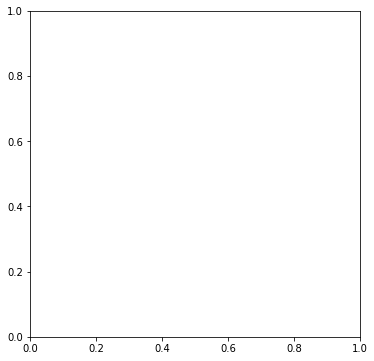

In [ ]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

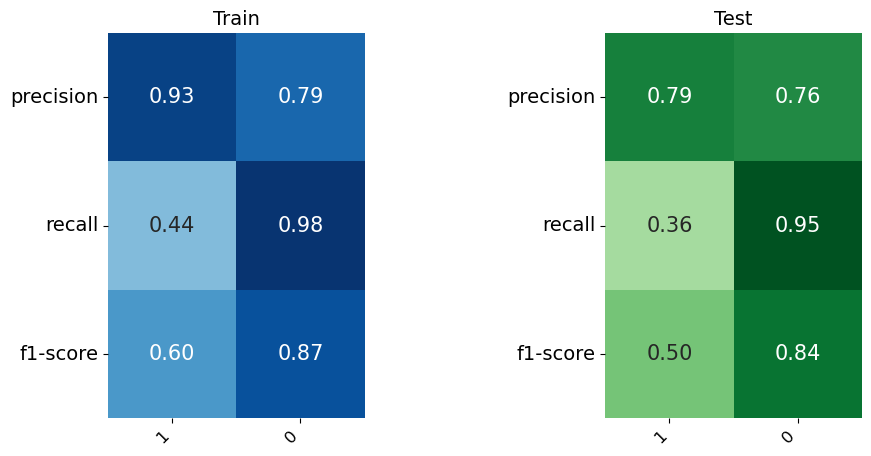

In [ ]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

### Prediksi

In [ ]:
pred_data = ['aplikasi gojek jelek banget']